In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [2]:
df = pd.read_csv("//content//iris data set.zip")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [20]:
x = df.drop(columns=['species'])
y = df['species']
x.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [21]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=69)

In [24]:
x_train.shape

(105, 4)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_test[:1])
y.head(3)


[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]
[[-1.02311343  1.37659354 -1.36896431 -1.35948597]]


0    0
1    0
2    0
Name: species, dtype: int64

In [33]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [46]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=( x_train.shape[-1] ,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                160       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 1.1964 - accuracy: 0.2476 - 913ms/epoch - 228ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1103 - accuracy: 0.3524 - 13ms/epoch - 3ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0539 - accuracy: 0.4381 - 13ms/epoch - 3ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0257 - accuracy: 0.4952 - 13ms/epoch - 3ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9536 - accuracy: 0.4952 - 12ms/epoch - 3ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9130 - accuracy: 0.6381 - 13ms/epoch - 3ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8900 - accuracy: 0.6286 - 13ms/epoch - 3ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8687 - accuracy: 0.6762 - 13ms/epoch - 3ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8317 - accuracy: 0.7524 - 12ms/epoch - 3ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7773 - accuracy: 0.7238 - 13ms/epoch - 3ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7813 - accuracy: 0.7333 - 12ms/epoch - 3ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7685 - accuracy: 0.7429 - 12ms/epoch - 3ms/step
Epoch 13/100
4/4 - 0s - loss: 0.7169 - accurac

In [49]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 5ms/step
[[9.9986339e-01 1.3609193e-04 4.2457077e-07]
 [2.9420016e-02 8.5403699e-01 1.1654297e-01]
 [9.9945462e-01 5.4213440e-04 3.3749670e-06]
 [2.2251588e-04 2.2673288e-02 9.7710419e-01]
 [9.9922729e-01 7.6699746e-04 5.6763552e-06]]


In [50]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [51]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: species, dtype: int64


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [54]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


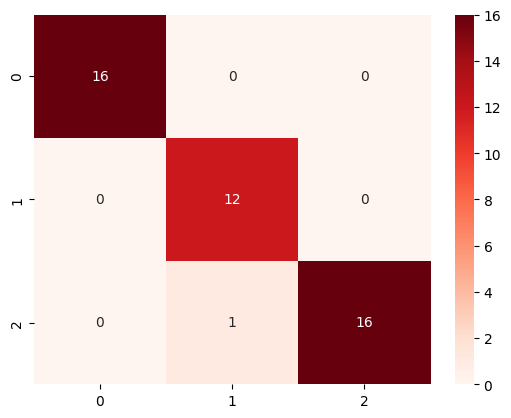

In [55]:
ax = sns.heatmap(cm, annot = True, fmt='d', cmap='Reds')

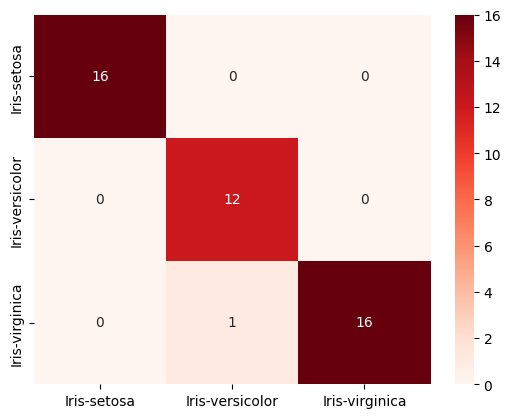

In [58]:
ax = sns.heatmap(cm, annot = True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)

Text(0.5, 1.0, 'confusion matrix for iris dataset prediction')

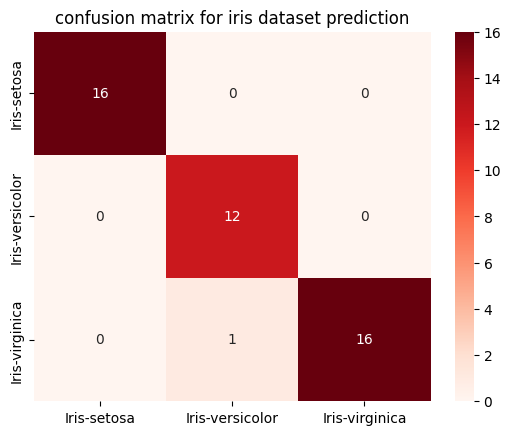

In [59]:
ax = sns.heatmap(cm, annot = True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for iris dataset prediction')

Text(50.72222222222221, 0.5, 'actual')

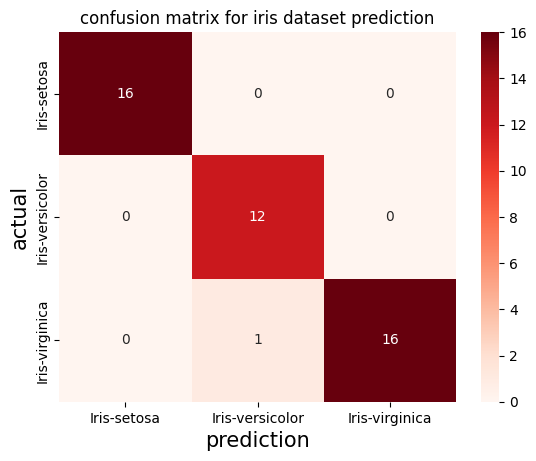

In [60]:
ax = sns.heatmap(cm, annot = True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for iris dataset prediction')
ax.set_xlabel('prediction', fontsize=15)
ax.set_ylabel('actual', fontsize=15)